In [66]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from pydataset import data

3126


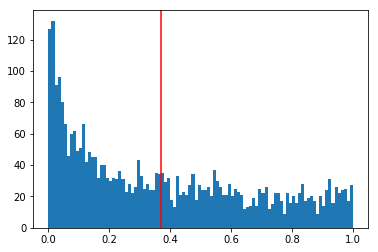

In [3]:
nums_orig = data('mid').power  #balance of power in military disputes
print len(nums_orig)

plt.hist(nums_orig,bins=100)
plt.axvline(x=nums_orig.mean(), color='r')
plt.show()



In [33]:
N=300

def sample_mean_std(buf, N):
    samp = np.random.choice(buf, size=N)
    mean = samp.mean()
    mean_diff = samp-mean
    s = (np.sum(np.power(mean_diff, 2)) / N)
    std_dev_est = math.sqrt(s)/math.sqrt(N)
    return (mean, std_dev_est)

(u,std) = sample_mean_std(nums_orig, N)
true_u=nums_orig.mean()
print "true mean=%.2f, est. mean=%.2f, 95%%ci = (%.2f, %.2f)"%(true_u, u, u-2*std, u+2*std)

true mean=0.37, est. mean=0.35, 95%ci = (0.32, 0.39)


hit 95.78% of samples


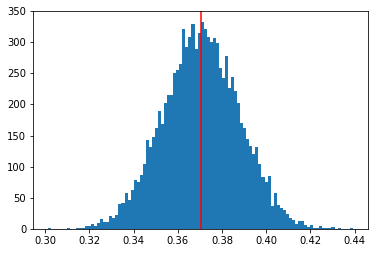

In [37]:
hit = 0
means = []
for i in range(0,10000):
    (u,std) = sample_mean_std(nums_orig, N)
    err = np.abs(u - true_u)
    success = err < 2 * std
    if (success):
        hit = hit + 1
    means.append(u)

print "hit %.2f%% of samples"%(hit/10000.0 * 100)
plt.hist(means,bins=100)
plt.axvline(x=nums_orig.mean(), color='r')



true median=0.30
bootstrap median=0.23, 0.35


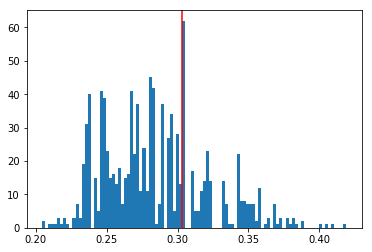

true mean=0.37
bootstrap mean=0.33, 0.39


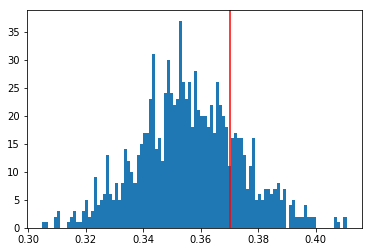

In [65]:
N_boots = 1000


def bootstrap(buf, fn, n_boots,ci,samp_size=N):
    vals = []
    buf_s = np.random.choice(buf,size=samp_size)
    for i in range(0,n_boots):
        samp = np.random.choice(buf_s, size=samp_size, replace=True)
        vals.append(fn(samp))
    return(np.percentile(vals,ci), np.percentile(vals,100.0-ci), vals)


print "true median=%.2f"%(np.median(nums_orig))
(ci1, ci2, vals) = bootstrap(nums_orig,np.median,N_boots,5.0)
print "bootstrap median=%.2f, %.2f"%(ci1, ci2)
plt.hist(vals,bins=100)
plt.axvline(x=nums_orig.median(), color='r')
plt.show()


print "true mean=%.2f"%(true_u)
(ci1, ci2, vals) = bootstrap(nums_orig,np.mean,N_boots,5.0)
print "bootstrap mean=%.2f, %.2f"%(ci1, ci2)
plt.hist(vals,bins=100)
plt.axvline(x=nums_orig.mean(), color='r')
plt.show()



In [90]:
import hyperloglog
from faker import Faker

error_rate = 0.05# accept 5% counting error
hll = hyperloglog.HyperLogLog(error_rate)  
p = int(math.ceil(math.log((1.04 / error_rate) ** 2, 2)))
print "%d buckets needed"%(1 << p)

fake = Faker()
ns = []
for i in range(0,100):
    ns.append(fake.name())

samps = np.random.choice(ns, size=10000, replace=True)
for s in samps:
    hll.add(s)
print len(hll)

512 buckets needed
105
